In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
coffee_production = pd.read_csv("./data/coffee/total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the top third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.
* Save the report out as an image.

In [13]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [9]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

In [8]:
axes_settings = {'spines.top': False, 'spines.right': False}

plt.rc("axes", **axes_settings)

### Data Prep

In [42]:
brazil_vs_others = coffee_production.assign(
    rest_of_world = coffee_production.drop('Brazil', axis=1).sum(axis=1)
).loc[:, ['Brazil', 'rest_of_world']].astype({'Brazil': 'float64'})

brazil_vs_others['share'] = brazil_vs_others['Brazil'] * 100 / brazil_vs_others.sum(axis=1)

brazil_vs_others.head()

total_production,Brazil,rest_of_world,share
1990,27285.6286,65944.431,29.266986
1991,27293.4934,73973.191,26.952095
1992,34603.3542,63922.545,35.121074
1993,28166.9786,63597.643,30.694813
1994,28192.0470,65121.147,30.212284


In [29]:
coffee_production_top5_2018 = coffee_production.loc['2018', :]
top5 = ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']
# coffee_production_top5_2018 = coffee_production_top5_2018.assign(
#     rest_of_world = coffee_production_top5_2018.drop(top5, axis=1).sum(axis=1)
# ).loc[:, top5 + ['rest_of_world']]
coffee_production_top5_2018['Rest of World'] = coffee_production_top5_2018.drop(top5).sum()
coffee_production_top5_2018 = pd.DataFrame(coffee_production_top5_2018.loc[top5 + ['Rest of World']])

In [30]:
pd.DataFrame(coffee_production_top5_2018)

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
Rest of World,45786.0003


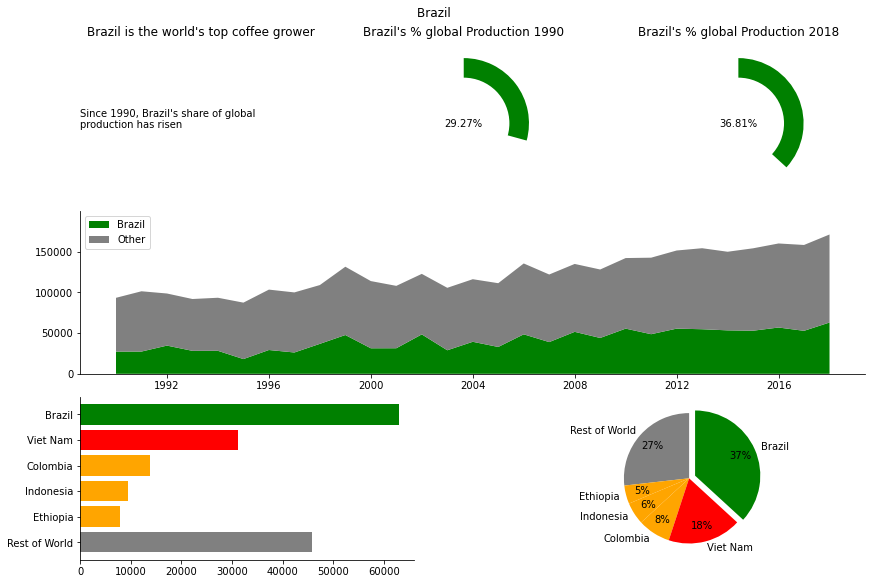

In [77]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
grid = GridSpec(9, 9, figure=fig)

ax_11 = fig.add_subplot(grid[:3, :3])
ax_11.set_title("Brazil is the world's top coffee grower")
ax_11.text(0, .4, """
Since 1990, Brazil's share of global
production has risen
""")
ax_11.axis('off')


ax_12 = fig.add_subplot(grid[:3, 3:6])
ax_12.set_title("Brazil's % global Production 1990")
ax_12.pie(brazil_vs_others.loc['1990'].iloc[::-1],
         startangle=90,
         colors=['green', 'white'])
ax_12.add_artist(plt.Circle((0, 0), 0.7, fc='white'))
ax_12.text(0, 0, f"{brazil_vs_others.loc['1990', 'share']:.2f}%", ha='center', va='center')

ax_13 = fig.add_subplot(grid[:3, 6:])
ax_13.set_title("Brazil's % global Production 2018")
ax_13.pie(brazil_vs_others.loc['2018'].iloc[::-1],
         startangle=90,
         colors=['green', 'white'])
ax_13.add_artist(plt.Circle((0, 0), 0.7, fc='white'))
ax_13.text(0, 0, f"{brazil_vs_others.loc['2018', 'share']:.2f}%", ha='center', va='center')

ax_2 = fig.add_subplot(grid[3:6, :])
ax_2.stackplot(brazil_vs_others.index,
              brazil_vs_others['Brazil'],
              brazil_vs_others['rest_of_world'],
              labels=['Brazil', 'Other'],
              colors=['green', 'gray'])
ax_2.set_xticks(brazil_vs_others.index[2::4])
ax_2.set_ylim(0, 200000)
ax_2.set_yticks([0, 50000, 100000, 150000])
ax_2.legend(loc='upper left')

ax_31 = fig.add_subplot(grid[6:, :4])
ax_31.barh(coffee_production_top5_2018.index[::-1],
          coffee_production_top5_2018['2018'].iloc[::-1],
          color=['gray', 'orange', 'orange', 'orange', 'red', 'green'])

ax_32 = fig.add_subplot(grid[6:, 5:])
ax_32.pie(coffee_production_top5_2018['2018'].iloc[::-1],
          labels=coffee_production_top5_2018.index[::-1],
         startangle=90,
         colors=['gray', 'orange', 'orange', 'orange', 'red', 'green'],
         autopct='%.0f%%',
         pctdistance=.75,
         explode=[0, 0, 0, 0, 0, .1])

fig.suptitle("Brazil ")
plt.show()


### Meshgrid Layout

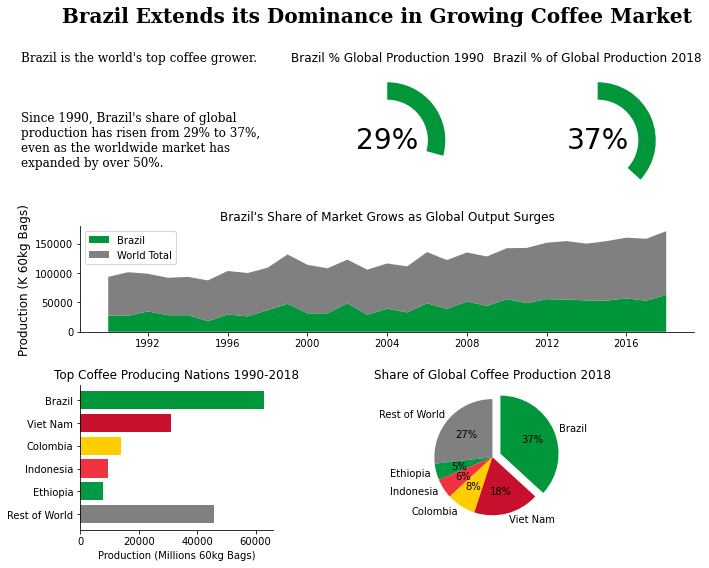

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [19]:
prices_paid_to_growers = pd.read_csv("coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

In [23]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


(array([5., 4., 3., 4., 4., 6., 0., 2., 0., 1.]),
 array([0.63767231, 0.9229374 , 1.2082025 , 1.4934676 , 1.7787327 ,
        2.06399779, 2.34926289, 2.63452799, 2.91979308, 3.20505818,
        3.49032328]),
 <BarContainer object of 10 artists>)

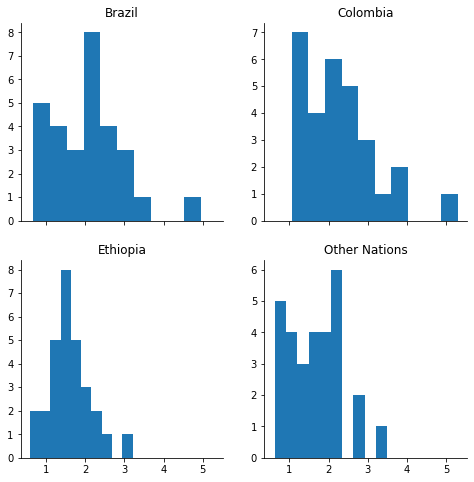